In [445]:
from bs4 import BeautifulSoup
import urllib.request
import urllib.parse
import requests
# urllib.request
import re
import json
import json2html
import pandas as pd

In [3]:
# 找到单个job的link
url = "http://ssl.gongyi.qq.com/m/201799/realtime.html?et=rtfx&gt=rtfx&ADTAG=rtfx"
url = "http://ssl.gongyi.qq.com/m/201799/realtime.html?tp=2&o=1"
# 初始页
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')
#all_matches = soup.findAll(attrs={'rel':['nofollow']})
#print(len(all_matches))

<!DOCTYPE html>
<html><head><meta charset="utf-8"/><meta content="腾讯公益" name="description"/><meta content="腾讯公益" name="keywords"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="webkit|ie-comp|ie-stand" name="renderer"/><meta content="no-siteapp" http-equiv="Cache-Control"/><meta content="width=device-width,initial-scale=1,user-scalable=0" name="viewport"/><meta content="telephone=no" name="format-detection"/><meta content="腾讯公益" name="apple-mobile-web-app-title"/><title>腾讯公益 - 实时战报</title><script type="text/javascript">(function() {
                var baseFontSize = 100;
                var baseWidth = 375;
                var clientWidth = document.documentElement.clientWidth || window.innerWidth;
                var innerWidth = Math.max(Math.min(clientWidth, 480), 360);

                var rem = 100;
                if (innerWidth >= 414) {
                    rem = Math.floor(innerWidth / baseWidth * baseFontSize * 0.98);
                } else {
  
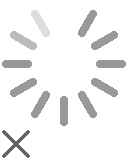
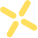
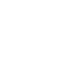
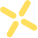
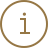
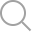
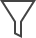
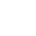

In [10]:
print(soup)

In [4]:
#tmp = '%E4%B8%AD%E5%9B%BD%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A'
#tmp1 = tmp.replace('%','\\')

In [5]:
#urllib.parse.unquote(tmp)

'中国社会福利基金会'

In [18]:
soup.body

<body ontouchstart=""><div id="pageContainer"><header><div class="h-ball1"></div><div class="h-ball2"></div><div class="h-ball3"></div><div class="h-ball4"></div><div class="h-shape1"></div><div class="h-shape2"></div><div class="h-shape3"></div><div class="h-shape4"></div><div class="h-shape5"></div>、<h1 class="surprise-logo">99实时战报</h1><div class="head-real-data"><div class="real-data-block"><div class="real-data"><b class="DinC j-data-num" data-num="2999" id="dNum1">0</b> 万元</div><p>腾讯基金会助力</p></div><div class="real-data-block"><div class="real-data"><b class="DinC j-data-num" data-num="0" id="dNum2">0</b> 万元</div><p>已配捐善款</p></div><div class="real-data-block"><div class="real-data"><b class="DinC j-data-num" data-num="0" id="dNum3">0</b> 个</div><p>共捐助项目</p></div></div><div class="brand-logo"><img src="//mat1.gtimg.com/gongyi/m/99/2017/head_logo_mini_wt.png"/></div></header><h1 class="board-title">9月9日榜单</h1><div class="mod-tab j-mod-tab"><div class="tab-nav-wrap j-tab-wrap"><ul cla

In [33]:
# 99公益日数据的API# api = 'http://ssl.gongyi.qq.com/cgi-bin/1799_gongyi_search_fund.fcgi?limit=100'

In [251]:
api_url = 'http://ssl.gongyi.qq.com/cgi-bin/1799_gongyi_search_fund.fcgi?limit=100'
page = requests.get(api_url)

In [252]:
page.text

'{"code":0,"op_time":"1506279879","data":{"total":116,"list":[{"id":79,"mn":498402175,"tms":51523,"title":"中华思源工程扶贫基金会","logo":"http://imgcdn.gongyi.qq.com/gongyi/74371d8caf56a60900c64c4ca020f087b3d1098c9a209036b43efa2b6f367297c9ff53354646ec81","desc":"中华思源工程扶贫基金会是由中共中央统战部主管，民建中央发起并负责日常管理，于2007年3月在民政部正式注册成立的全国公募基金会，它的宗旨是资助以扶贫和社会公益事业为主的“思源工程”活动，帮助弱势群体解决生产生活困难，促进中国贫困地区经济和社会事业发展。现任理事长为全国人大常委会副委员长、民建中央主席陈昌智。","uin":2806409577,"rk":14},{"id":40,"mn":1292478766,"tms":97226,"title":"爱德基金会","logo":"http://imgcdn.gongyi.qq.com/gongyi/3e28f14aa051684286b10ad99b1ac2b070f3e555d54ca27544c0477d961f15579aa6deebbe88ee1ee1256b4ead56b434","desc":"爱德基金会成立于1985年4月，旨在促进我国的教育、社会福利、医疗卫生、社区发展与环境保护、灾害管理等各项社会公益事业，迄今为止，项目区域累计覆盖全国31个省、市、自治区，逾千万人受益。","uin":95001117,"rk":6},{"id":105,"mn":161889998,"tms":408417,"title":"中华少年儿童慈善救助基金会","logo":"http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50","desc":"中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助

In [253]:

data = json.loads(page.text)

In [254]:
data['data']['list'][0]['mn']

498402175

In [54]:
#sorted_data = data

In [56]:
data_list = data['data']['list']
data_list

[{'desc': '中华思源工程扶贫基金会是由中共中央统战部主管，民建中央发起并负责日常管理，于2007年3月在民政部正式注册成立的全国公募基金会，它的宗旨是资助以扶贫和社会公益事业为主的“思源工程”活动，帮助弱势群体解决生产生活困难，促进中国贫困地区经济和社会事业发展。现任理事长为全国人大常委会副委员长、民建中央主席陈昌智。',
  'id': 79,
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/74371d8caf56a60900c64c4ca020f087b3d1098c9a209036b43efa2b6f367297c9ff53354646ec81',
  'mn': 498402175,
  'rk': 14,
  'title': '中华思源工程扶贫基金会',
  'tms': 51523,
  'uin': 2806409577},
 {'desc': '爱德基金会成立于1985年4月，旨在促进我国的教育、社会福利、医疗卫生、社区发展与环境保护、灾害管理等各项社会公益事业，迄今为止，项目区域累计覆盖全国31个省、市、自治区，逾千万人受益。',
  'id': 40,
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/3e28f14aa051684286b10ad99b1ac2b070f3e555d54ca27544c0477d961f15579aa6deebbe88ee1ee1256b4ead56b434',
  'mn': 1292478766,
  'rk': 6,
  'title': '爱德基金会',
  'tms': 97226,
  'uin': 95001117},
 {'desc': '中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助型、合作办、全透明的方针，对困境少年儿童进行救助。',
  'id': 105,
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50',
  'mn': 161889

In [57]:
sorted(data_list,key=lambda x: x['rk'], reverse=True)

[{'desc': '中国发展研究基金会的宗旨是支持政策研究、促进科学决策、服务中国发展。 基金会的资金主要来源于国内外企业、机构、个人的捐赠和赞助。基金会的资金主要用于支持国家政治、经济、社会等方面的政策试验、研究及儿童发展类公益项目。',
  'id': 312,
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/b0bfba802c3dd8de63641441da8da6115db575fd845327d5e6a37293864e0398215054caa5be2d40',
  'mn': 27338526,
  'rk': 55,
  'title': '中国发展研究基金会',
  'tms': 19043,
  'uin': 242494057},
 {'desc': '浙江省妇女儿童基金会（曾用名：浙江省儿童少年福利基金会、浙江省儿童基金会）成立于1981年，是一个为特定的公益目的而设立的、具有独立法人资格的纯公益社会组织。基金会的宗旨是：推动妇女儿童事业发展，促进妇女儿童权益的保障和平等发展，为贫困妇女儿童提供帮助，为妇女儿童办好事，办实事。',
  'id': 206,
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb04d06a51067661b97520411133e8c64aa09d4a0df939a99ea2eb7c2ee337002e679e3e624292c4f1a',
  'mn': 101662118,
  'rk': 29,
  'title': '浙江省妇女儿童基金会',
  'tms': 8184,
  'uin': 2842798747},
 {'desc': '湖北省慈善总会成立于1995年9月，属具有独立法人资格的全省性公益类社会团体，秉承“安老、扶幼、助学、济困、救灾”的宗旨于2016年12月获得公开募捐资格。',
  'id': 302,
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb0bfd25eebfb911b03bce59a6c690fb7639d2e3c9d4d501308d2ea2fb804f02762cc8ced365

In [313]:
url_page1='http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=1&md=9&jsoncallback=_martch99_sear_fn_'

url_page2='http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=2&md=9&jsoncallback=_martch99_sear_fn_'

url_page3='http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=3&md=9&jsoncallback=_martch99_sear_fn_'

url_page4='http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=4&md=9&jsoncallback=_martch99_sear_fn_'


In [314]:
#http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=1&md=9&jsoncallback=_martch99_sear_fn_

In [315]:
page1 = requests.get(url_page1).text

In [154]:
re.page1

'_martch99_sear_fn_(\n{"code":0,"msg":"success","op_time":"1506114505","data":{"rd":{"tmm":30000051392,"money":30576863074,"projs":6239},"ngo":{"list":[{"id":"105","mn":4456857294,"tms":408417,"title":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50","desc":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E6%8C%89%E7%85%A7%E6%B0%91%E9%97%B4%E6%80%A7%E3%80%81%E8%B5%84%E5%8A%A9%E5%9E%8B%E3%80%81%E5%90%88%E4%BD%9C%E5%8A%9E%E3%80%81%E5%85%A8%E9%80%8F%E6%98%8E%E7%9A%84%E6%96%B9%E9%92%88%EF%BC%8C%E5%AF%B9%E5%9B%B0%E5%A2%83%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BF%9B%E8%A1%8C%E6%95%91%

In [65]:
tmp = page1


In [182]:
page1_text = urllib.parse.unquote(tmp)
page1_text

'_martch99_sear_fn_(\n{"code":0,"msg":"success","op_time":"1506114505","data":{"rd":{"tmm":30000051392,"money":30576863074,"projs":6239},"ngo":{"list":[{"id":"105","mn":4456857294,"tms":408417,"title":"中华少年儿童慈善救助基金会","logo":"http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50","desc":"中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助型、合作办、全透明的方针，对困境少年儿童进行救助。","uin":"2724954300","rk":"1"},{"id":"100","mn":3059102635,"tms":337033,"title":"中国社会福利基金会","logo":"http://imgcdn.gongyi.qq.com/gongyi/e2f18f1858ae40342a1d6b32da1b99058fbef4f3973897f35771419640797199588681c158878e89a3fec12800d0dceb","desc":"我会成立于2005年6月14日，原名中国社会福利教育基金会，2011年7月15日经民政部批准更名为“中国社会福利基金会”。英文译名：China Social Welfare Foundation，缩写：CSWF。基金会性质：全国性公募基金会。发起人：民政部。基金会宗旨：以民为本、关注民生、扶危济困、共享和谐，服务社会福利事业。","uin":"2693566221","rk":"2"},{"id":"83","mn":1692998810,"tms":228060,"title":"中国儿童少年基金会","logo":"http://imgcdn.gongyi.qq.com/gongyi/11ad1700130bf2720d6d95d5548081508562

In [316]:
page2_text = page1[20:(-3)]
page2_text[-30:]

'"rk":"20"}],"havenext":"1"}}}\n'

In [326]:
#begin wiht "ngo":{"list":
                
#end with ,"havenext":
text_20 = re.search(r'\{(.*)\}',page1)


In [327]:
text_20.group()

'{"code":0,"msg":"success","op_time":"1506282316","data":{"rd":{"tmm":30000051392,"money":30576863074,"projs":6239},"ngo":{"list":[{"id":"105","mn":4456857294,"tms":408417,"title":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50","desc":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E6%8C%89%E7%85%A7%E6%B0%91%E9%97%B4%E6%80%A7%E3%80%81%E8%B5%84%E5%8A%A9%E5%9E%8B%E3%80%81%E5%90%88%E4%BD%9C%E5%8A%9E%E3%80%81%E5%85%A8%E9%80%8F%E6%98%8E%E7%9A%84%E6%96%B9%E9%92%88%EF%BC%8C%E5%AF%B9%E5%9B%B0%E5%A2%83%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BF%9B%E8%A1%8C%E6%95%91%E5%8A%A9%E3%80%82","u

In [286]:
#print(text_20.group())

In [287]:
#page2_text

In [290]:
#page2_text[1100:1133]

'育福利事业、服务社会、服务大局为宗旨，精心打造和深化拓展了"春蕾计'

In [317]:
structured_data = json.loads(page2_text)
#page2_text

In [318]:
structured_data

{'code': 0,
 'data': {'ngo': {'havenext': '1',
   'list': [{'desc': '%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E6%8C%89%E7%85%A7%E6%B0%91%E9%97%B4%E6%80%A7%E3%80%81%E8%B5%84%E5%8A%A9%E5%9E%8B%E3%80%81%E5%90%88%E4%BD%9C%E5%8A%9E%E3%80%81%E5%85%A8%E9%80%8F%E6%98%8E%E7%9A%84%E6%96%B9%E9%92%88%EF%BC%8C%E5%AF%B9%E5%9B%B0%E5%A2%83%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BF%9B%E8%A1%8C%E6%95%91%E5%8A%A9%E3%80%82',
     'id': '105',
     'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50',
     'mn': 4456857294,
     'rk': '1',
     'title': '%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
     'tms': 408417,
     'uin': '27249543

In [319]:
data_ngo_list = structured_data['data']['ngo']['list']

In [320]:
data_ngo_list

[{'desc': '%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E6%8C%89%E7%85%A7%E6%B0%91%E9%97%B4%E6%80%A7%E3%80%81%E8%B5%84%E5%8A%A9%E5%9E%8B%E3%80%81%E5%90%88%E4%BD%9C%E5%8A%9E%E3%80%81%E5%85%A8%E9%80%8F%E6%98%8E%E7%9A%84%E6%96%B9%E9%92%88%EF%BC%8C%E5%AF%B9%E5%9B%B0%E5%A2%83%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BF%9B%E8%A1%8C%E6%95%91%E5%8A%A9%E3%80%82',
  'id': '105',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50',
  'mn': 4456857294,
  'rk': '1',
  'title': '%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 408417,
  'uin': '2724954300'},
 {'desc': '%E6%88%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2005%E5%B9%B46%E6

In [306]:
def decode_ngo_list(ngo_list):
    for i in range(len(ngo_list)):
        ngo_list[i]['desc'] = urllib.parse.unquote(ngo_list[i]['desc'])
        ngo_list[i]['logo'] = urllib.parse.unquote(ngo_list[i]['logo'])
        ngo_list[i]['title'] = urllib.parse.unquote(ngo_list[i]['title'])
    return ngo_list

In [321]:
data_ngo_list = decode_ngo_list(data_ngo_list)

In [322]:
data_ngo_list

[{'desc': '中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助型、合作办、全透明的方针，对困境少年儿童进行救助。',
  'id': '105',
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50',
  'mn': 4456857294,
  'rk': '1',
  'title': '中华少年儿童慈善救助基金会',
  'tms': 408417,
  'uin': '2724954300'},
 {'desc': '我会成立于2005年6月14日，原名中国社会福利教育基金会，2011年7月15日经民政部批准更名为“中国社会福利基金会”。英文译名：China Social Welfare Foundation，缩写：CSWF。基金会性质：全国性公募基金会。发起人：民政部。基金会宗旨：以民为本、关注民生、扶危济困、共享和谐，服务社会福利事业。',
  'id': '100',
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/e2f18f1858ae40342a1d6b32da1b99058fbef4f3973897f35771419640797199588681c158878e89a3fec12800d0dceb',
  'mn': 3059102635,
  'rk': '2',
  'title': '中国社会福利基金会',
  'tms': 337033,
  'uin': '2693566221'},
 {'desc': '中国儿童少年基金会(简称：中国儿基会)成立于1981年7月28日，是新中国成立后的第一家国家级公募基金会。中国儿基会以竭诚服务儿童少年教育福利事业、服务社会、服务大局为宗旨，精心打造和深化拓展了"春蕾计划"、"安康计划"、"儿童快乐家园"、“HELLO小孩”等品牌项目。形成儿童教育资助、大病救助、安全健康、灾后紧急援助立体化资助服务体系，被民政部评为5A级基金会。',
  'id': '83',
  'logo': 'http://

In [364]:
page1 = requests.get(url_page1).text

In [365]:
page1_json_text = re.search(r'{(.*)\}',page1).group()

In [366]:
page1_json_text

'{"code":0,"msg":"success","op_time":"1506283468","data":{"rd":{"tmm":30000051392,"money":30576863074,"projs":6239},"ngo":{"list":[{"id":"105","mn":4456857294,"tms":408417,"title":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50","desc":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E6%8C%89%E7%85%A7%E6%B0%91%E9%97%B4%E6%80%A7%E3%80%81%E8%B5%84%E5%8A%A9%E5%9E%8B%E3%80%81%E5%90%88%E4%BD%9C%E5%8A%9E%E3%80%81%E5%85%A8%E9%80%8F%E6%98%8E%E7%9A%84%E6%96%B9%E9%92%88%EF%BC%8C%E5%AF%B9%E5%9B%B0%E5%A2%83%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BF%9B%E8%A1%8C%E6%95%91%E5%8A%A9%E3%80%82","u

In [367]:
json_page1 = json.loads(page1_json_text)

In [368]:
list_page1 = json_page1['data']['ngo']['list']

### 合并JSON数据list

In [328]:
page2 = requests.get(url_page2).text
page3 = requests.get(url_page3).text
page4 = requests.get(url_page4).text


In [334]:
page2_json_text = re.search(r'\{(.*)\}',page2).group()
page3_json_text = re.search(r'\{(.*)\}',page3).group()
page4_json_text = re.search(r'\{(.*)\}',page4).group()

In [335]:
page2_json_text

'{"code":0,"msg":"success","op_time":"1506282632","data":{"rd":{"tmm":30000051392,"money":30576863074,"projs":6239},"ngo":{"list":[{"id":"43","mn":319019560,"tms":20427,"title":"%E4%B8%AD%E5%8D%8E%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F9a223de4799cf0d59577d15717b8cc9045b0a602988828f4039a324e2d992e80346dc459434812cb","desc":"%E4%B8%AD%E5%8D%8E%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%822009%E5%B9%B41%E6%9C%88%E7%BB%8F%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E6%B0%91%E6%94%BF%E9%83%A8%E6%89%B9%E5%87%86%E8%AE%BE%E7%AB%8B%E7%99%BB%E8%AE%B0%EF%BC%8C%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E9%83%A8%E9%97%A8%E4%B8%BA%E6%B0%91%E6%94%BF%E9%83%A8%E3%80%82","uin":"2247243585","rk":"21"},{"id":"124","mn":226460854,"tms":23292,"title":"%E5%8C%97%E4%BA%AC%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%

In [336]:
json_page2 = json.loads(page2_json_text)
json_page3 = json.loads(page3_json_text)
json_page4 = json.loads(page4_json_text)

In [344]:
list_page2 = json_page2['data']['ngo']['list']
list_page3 = json_page3['data']['ngo']['list']
list_page4 = json_page4['data']['ngo']['list']

In [361]:
list_page2

[{'desc': '%E4%B8%AD%E5%8D%8E%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%822009%E5%B9%B41%E6%9C%88%E7%BB%8F%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E6%B0%91%E6%94%BF%E9%83%A8%E6%89%B9%E5%87%86%E8%AE%BE%E7%AB%8B%E7%99%BB%E8%AE%B0%EF%BC%8C%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E9%83%A8%E9%97%A8%E4%B8%BA%E6%B0%91%E6%94%BF%E9%83%A8%E3%80%82',
  'id': '43',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F9a223de4799cf0d59577d15717b8cc9045b0a602988828f4039a324e2d992e80346dc459434812cb',
  'mn': 319019560,
  'rk': '21',
  'title': '%E4%B8%AD%E5%8D%8E%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 20427,
  'uin': '2247243585'},
 {'desc': '%E5%8C%97%E4%BA%AC%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1994%E5%B9%B4%EF%BC%8C%E6%98%AF%E4%B8%BA%E9%9D%92%E5%B0%91%E5%B9%B4%E7%BE%A

In [369]:
combined_list = list_page1 + list_page2 + list_page3 + list_page4

In [370]:
combined_list

[{'desc': '%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E6%8C%89%E7%85%A7%E6%B0%91%E9%97%B4%E6%80%A7%E3%80%81%E8%B5%84%E5%8A%A9%E5%9E%8B%E3%80%81%E5%90%88%E4%BD%9C%E5%8A%9E%E3%80%81%E5%85%A8%E9%80%8F%E6%98%8E%E7%9A%84%E6%96%B9%E9%92%88%EF%BC%8C%E5%AF%B9%E5%9B%B0%E5%A2%83%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BF%9B%E8%A1%8C%E6%95%91%E5%8A%A9%E3%80%82',
  'id': '105',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50',
  'mn': 4456857294,
  'rk': '1',
  'title': '%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 408417,
  'uin': '2724954300'},
 {'desc': '%E6%88%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2005%E5%B9%B46%E6

In [371]:
len(combined_list)

80

In [372]:
combined_list[1]

{'desc': '%E6%88%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2005%E5%B9%B46%E6%9C%8814%E6%97%A5%EF%BC%8C%E5%8E%9F%E5%90%8D%E4%B8%AD%E5%9B%BD%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E6%95%99%E8%82%B2%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C2011%E5%B9%B47%E6%9C%8815%E6%97%A5%E7%BB%8F%E6%B0%91%E6%94%BF%E9%83%A8%E6%89%B9%E5%87%86%E6%9B%B4%E5%90%8D%E4%B8%BA%E2%80%9C%E4%B8%AD%E5%9B%BD%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E2%80%9D%E3%80%82%E8%8B%B1%E6%96%87%E8%AF%91%E5%90%8D%EF%BC%9AChina%20Social%20Welfare%20Foundation%EF%BC%8C%E7%BC%A9%E5%86%99%EF%BC%9ACSWF%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E6%80%A7%E8%B4%A8%EF%BC%9A%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%8F%91%E8%B5%B7%E4%BA%BA%EF%BC%9A%E6%B0%91%E6%94%BF%E9%83%A8%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E5%AE%97%E6%97%A8%EF%BC%9A%E4%BB%A5%E6%B0%91%E4%B8%BA%E6%9C%AC%E3%80%81%E5%85%B3%E6%B3%A8%E6%B0%91%E7%94%9F%E3%80%81%E6%89%B6%E5%8D%B1%E6%B5%8E%E5%9B%B0%E3%80%81%E5%85%B1%E4%BA%AB%E5%92%8

In [2]:
import pickle
pickle.dump(combined_list,open('combined_list.p','w'))

NameError: name 'combined_list' is not defined

### Decode已有数据

In [373]:
def decode_ngo_list(ngo_list):
    for i in range(len(ngo_list)):
        ngo_list[i]['desc'] = urllib.parse.unquote(ngo_list[i]['desc'])
        ngo_list[i]['logo'] = urllib.parse.unquote(ngo_list[i]['logo'])
        ngo_list[i]['title'] = urllib.parse.unquote(ngo_list[i]['title'])
    return ngo_list

In [374]:
ngo_list = decode_ngo_list(combined_list)

In [375]:
ngo_list

[{'desc': '中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助型、合作办、全透明的方针，对困境少年儿童进行救助。',
  'id': '105',
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50',
  'mn': 4456857294,
  'rk': '1',
  'title': '中华少年儿童慈善救助基金会',
  'tms': 408417,
  'uin': '2724954300'},
 {'desc': '我会成立于2005年6月14日，原名中国社会福利教育基金会，2011年7月15日经民政部批准更名为“中国社会福利基金会”。英文译名：China Social Welfare Foundation，缩写：CSWF。基金会性质：全国性公募基金会。发起人：民政部。基金会宗旨：以民为本、关注民生、扶危济困、共享和谐，服务社会福利事业。',
  'id': '100',
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/e2f18f1858ae40342a1d6b32da1b99058fbef4f3973897f35771419640797199588681c158878e89a3fec12800d0dceb',
  'mn': 3059102635,
  'rk': '2',
  'title': '中国社会福利基金会',
  'tms': 337033,
  'uin': '2693566221'},
 {'desc': '中国儿童少年基金会(简称：中国儿基会)成立于1981年7月28日，是新中国成立后的第一家国家级公募基金会。中国儿基会以竭诚服务儿童少年教育福利事业、服务社会、服务大局为宗旨，精心打造和深化拓展了"春蕾计划"、"安康计划"、"儿童快乐家园"、“HELLO小孩”等品牌项目。形成儿童教育资助、大病救助、安全健康、灾后紧急援助立体化资助服务体系，被民政部评为5A级基金会。',
  'id': '83',
  'logo': 'http://

### 给List数据排序

In [380]:
sorted_data_ngo_list = sorted(ngo_list,key = lambda x:int(x['rk']), reverse=False)

In [381]:
sorted_data_ngo_list

[{'desc': '中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助型、合作办、全透明的方针，对困境少年儿童进行救助。',
  'id': '105',
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50',
  'mn': 4456857294,
  'rk': '1',
  'title': '中华少年儿童慈善救助基金会',
  'tms': 408417,
  'uin': '2724954300'},
 {'desc': '我会成立于2005年6月14日，原名中国社会福利教育基金会，2011年7月15日经民政部批准更名为“中国社会福利基金会”。英文译名：China Social Welfare Foundation，缩写：CSWF。基金会性质：全国性公募基金会。发起人：民政部。基金会宗旨：以民为本、关注民生、扶危济困、共享和谐，服务社会福利事业。',
  'id': '100',
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/e2f18f1858ae40342a1d6b32da1b99058fbef4f3973897f35771419640797199588681c158878e89a3fec12800d0dceb',
  'mn': 3059102635,
  'rk': '2',
  'title': '中国社会福利基金会',
  'tms': 337033,
  'uin': '2693566221'},
 {'desc': '中国儿童少年基金会(简称：中国儿基会)成立于1981年7月28日，是新中国成立后的第一家国家级公募基金会。中国儿基会以竭诚服务儿童少年教育福利事业、服务社会、服务大局为宗旨，精心打造和深化拓展了"春蕾计划"、"安康计划"、"儿童快乐家园"、“HELLO小孩”等品牌项目。形成儿童教育资助、大病救助、安全健康、灾后紧急援助立体化资助服务体系，被民政部评为5A级基金会。',
  'id': '83',
  'logo': 'http://

In [389]:
sorted_data_ngo_list[1]

{'desc': '我会成立于2005年6月14日，原名中国社会福利教育基金会，2011年7月15日经民政部批准更名为“中国社会福利基金会”。英文译名：China Social Welfare Foundation，缩写：CSWF。基金会性质：全国性公募基金会。发起人：民政部。基金会宗旨：以民为本、关注民生、扶危济困、共享和谐，服务社会福利事业。',
 'id': '100',
 'logo': 'http://imgcdn.gongyi.qq.com/gongyi/e2f18f1858ae40342a1d6b32da1b99058fbef4f3973897f35771419640797199588681c158878e89a3fec12800d0dceb',
 'mn': 3059102635,
 'rk': '2',
 'title': '中国社会福利基金会',
 'tms': 337033,
 'uin': '2693566221'}

### Write into a html table 

In [ ]:
from json2html import *

In [ ]:
#page1 里面的东西大部分是text，而且是双引号，需要用json.loads读成 json格式，
#实际就是 dictionary的格式
#而data.ngo.list里面，全部已经是单引号了，那么这个就已经是json(dict)格式了，
#直接用，不用再转一遍了

In [393]:
sorted_data_ngo_list[1]

{'desc': '我会成立于2005年6月14日，原名中国社会福利教育基金会，2011年7月15日经民政部批准更名为“中国社会福利基金会”。英文译名：China Social Welfare Foundation，缩写：CSWF。基金会性质：全国性公募基金会。发起人：民政部。基金会宗旨：以民为本、关注民生、扶危济困、共享和谐，服务社会福利事业。',
 'id': '100',
 'logo': 'http://imgcdn.gongyi.qq.com/gongyi/e2f18f1858ae40342a1d6b32da1b99058fbef4f3973897f35771419640797199588681c158878e89a3fec12800d0dceb',
 'mn': 3059102635,
 'rk': '2',
 'title': '中国社会福利基金会',
 'tms': 337033,
 'uin': '2693566221'}

In [399]:
#json1 = json.loads(sorted_data_ngo_list[0])

In [433]:
tmp = json2html.convert(json = sorted_data_ngo_list[0])

In [434]:
tmp

'<table border="1"><tr><th>id</th><td>105</td></tr><tr><th>mn</th><td>4456857294</td></tr><tr><th>tms</th><td>408417</td></tr><tr><th>title</th><td>中华少年儿童慈善救助基金会</td></tr><tr><th>logo</th><td>http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50</td></tr><tr><th>desc</th><td>中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助型、合作办、全透明的方针，对困境少年儿童进行救助。</td></tr><tr><th>uin</th><td>2724954300</td></tr><tr><th>rk</th><td>1</td></tr></table>'

In [436]:
type(tmp)
f = open('test.txt','a')
f.write(tmp)
f.close()

In [398]:
#html_table_script = json2html.convert(json = sorted_data_ngo_list[2])
#这里读进来直接就是 JSON file, 不需要用 json.loads去load，
#html_table_script

'<table border="1"><tr><th>id</th><td>83</td></tr><tr><th>mn</th><td>1692998810</td></tr><tr><th>tms</th><td>228060</td></tr><tr><th>title</th><td>中国儿童少年基金会</td></tr><tr><th>logo</th><td>http://imgcdn.gongyi.qq.com/gongyi/11ad1700130bf2720d6d95d5548081508562893642109561f4f8442fdbe654a19f49e217381c5117</td></tr><tr><th>desc</th><td>中国儿童少年基金会(简称：中国儿基会)成立于1981年7月28日，是新中国成立后的第一家国家级公募基金会。中国儿基会以竭诚服务儿童少年教育福利事业、服务社会、服务大局为宗旨，精心打造和深化拓展了"春蕾计划"、"安康计划"、"儿童快乐家园"、“HELLO小孩”等品牌项目。形成儿童教育资助、大病救助、安全健康、灾后紧急援助立体化资助服务体系，被民政部评为5A级基金会。</td></tr><tr><th>uin</th><td>611990116</td></tr><tr><th>rk</th><td>3</td></tr></table>'

In [426]:
html_file = open('NGO_Table.html','a')
#tmp = 'several damage'
type(tmp)
html_file.write(tmp)
html_file.close()

In [411]:
type(html_table_script)

str

In [443]:
with open('NGO_Table.html','a') as html_file:
    for i in range(len(sorted_data_ngo_list)):
        html_table_script = json2html.convert(json = sorted_data_ngo_list[i])
        html_file.write(html_table_script)
        html_file.write('\n')
        empty_line = '<br> \n <br>'
        html_file.write(empty_line)
        html_file.write('\n')
        
html_file.close()
    


### Write into a csv file

In [444]:
## first, we need convert json data into dataframe

In [475]:
DF_NGO = pd.DataFrame(sorted_data_ngo_list)

In [476]:
DF_NGO.columns

Index(['desc', 'id', 'logo', 'mn', 'rk', 'title', 'tms', 'uin'], dtype='object')

In [479]:
DF_NGO_Yuan = DF_NGO['mn']/100

In [481]:
DF_NGO_Yuan

0     44568572.94
1     30591026.35
2     16929988.10
3     14331041.47
4     13677826.23
5     13408348.19
6     12924787.66
7     11620458.90
8     11281051.77
9      9994331.42
10     8358951.33
11     8248652.99
12     7721311.20
13     6320564.42
14     4984021.75
15     4766351.39
16     4431668.63
17     4418712.80
18     3534204.48
19     3346188.70
20     3190195.60
21     2264608.54
22     2244391.97
23     1928133.49
24     1629788.05
25     1407344.36
26     1257626.43
27     1099145.15
28     1040781.95
29     1016621.18
         ...     
50      427336.87
51      400919.46
52      344891.50
53      318172.85
54      317821.95
55      273385.26
56      272966.41
57      247672.06
58      243741.60
59      208410.18
60      185949.69
61      179552.73
62      176337.64
63      176231.78
64      163744.93
65      152440.58
66      146663.89
67      144591.38
68      138052.14
69      124708.97
70      103278.25
71       91938.10
72       91918.71
73       87790.47
74       7

In [484]:
DF_NGO_result = pd.concat([DF_NGO['rk'],DF_NGO['id'],DF_NGO['title'],\
                              DF_NGO_Yuan,DF_NGO['tms'],\
                              DF_NGO['desc'],DF_NGO['uin']],axis = 1)

In [485]:
DF_NGO_result

rk   id              title           mn     tms  \
0    1  105      中华少年儿童慈善救助基金会  44568572.94  408417   
1    2  100          中国社会福利基金会  30591026.35  337033   
2    3   83          中国儿童少年基金会  16929988.10  228060   
3    4  163            上海仁德基金会  14331041.47   93774   
4    5  245       深圳市爱佑未来慈善基金会  13677826.23  593776   
5    6  144          无锡灵山慈善基金会  13408348.19   83629   
6    7   40              爱德基金会  12924787.66   97226   
7    8   21          中国妇女发展基金会  11620458.90  115886   
8    9   78            中国扶贫基金会  11281051.77  213704   
9   10  102        上海真爱梦想公益基金会   9994331.42   95211   
10  11   16         深圳壹基金公益基金会   8358951.33   99731   
11  12  103         北京新阳光慈善基金会   8248652.99   59315   
12  13  145          阿拉善SEE基金会   7721311.20  188274   
13  14  101             深圳市慈善会   6320564.42   55558   
14  15   79        中华思源工程扶贫基金会   4984021.75   51523   
15  16  232            陕西省慈善协会   4766351.39   35338   
16  17  149            成都市慈善总会   4431668.63   30858   
17  18  228           长沙市慈善基金会   4418712.80   22666   
18  19   97          上海联劝公益基金会   3534204.48   30631   
19  20  307        北京天使妈妈慈善基金会   3346188.70   22511   
20  21   43          中华社会救助基金会   3190195.60   20427   
21  22  124         北京青少年发展基金会   2264608.54   23292   
22  23  297       上海市华侨事业发展基金会   2244391.97    4537   
23  24  128         深圳市社会公益基金会   1928133.49   18010   
24  25  235        中国听力医学发展基金会   1629788.05   12225   
25  26  295            湖南省慈善总会   1407344.36   17745   
26  27  302            湖北省慈善总会   1257626.43   35086   
27  28  290          中国志愿服务基金会   1099145.15    3056   
28  29  291        北京春苗儿童救助基金会   1040781.95    3570   
29  30  206         浙江省妇女儿童基金会   1016621.18    8184   
..  ..  ...                ...          ...     ...   
50  51  301            郴州市慈善总会    427336.87    4781   
51  52   93       江苏省儿童少年福利基金会    400919.46    1168   
52  53  110           中国红十字基金会    344891.50   15997   
53  54   73          中国人口福利基金会    318172.85    1901   
54  55  238       贵州省同心光彩事业基金会    317821.95    3634   
55  56  312          中国发展研究基金会    273385.26   19043   
56  57  150    成都市锦江区社会组织发展基金会    272966.41    3400   
57  58  160         河南省爱心助老基金会    247672.06    1010   
58  59  155  中国生物多样性保护与绿色发展基金会    243741.60    1658   
59  60  117          海南成美慈善基金会    208410.18    2297   
60  61  179         宁波市善园公益基金会    185949.69    2495   
61  62  229            宁波市慈善总会    179552.73    6008   
62  63    6         中国青少年发展基金会    176337.64    5019   
63  64  287        中关村精准医学基金会     176231.78    1573   
64  65  299         泰安市泰山慈善基金会    163744.93    1595   
65  66   36            中国绿化基金会    152440.58    2472   
66  67  209            青海省慈善总会    146663.89     464   
67  68   82        广东省青少年发展基金会    144591.38    2735   
68  69  130        浙江省青少年发展基金会    138052.14    1358   
69  70  324          安徽省红十字基金会    124708.97     927   
70  71  227          北京当代艺术基金会    103278.25     448   
71  72  139        湖南省残疾人福利基金会     91938.10      97   
72  73  147           上海宋庆龄基金会     91918.71    1117   
73  74  112        云南省青少年发展基金会     87790.47    1202   
74  75  118         中国下一代教育基金会     79841.07    1943   
75  76  326          中国法律援助基金会     77817.73     981   
76  77  275       安徽省出生缺陷救助基金会     77445.80     203   
77  78  273          中国文物保护基金会     75393.69   54554   
78  79  166       天津市妇女儿童发展基金会     68455.61     651   
79  80  244         四川省科技扶贫基金会     63668.26    1560   

                                                 desc         uin  
0   中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助型、合作办、全透明的方针...  2724954300  
1   我会成立于2005年6月14日，原名中国社会福利教育基金会，2011年7月15日经民政部批准...  2693566221  
2   中国儿童少年基金会(简称：中国儿基会)成立于1981年7月28日，是新中国成立后的第一家国家...   611990116  
3   上海仁德基金会是由爱德发起，2011年12月在上海市民政局注册成立的支持型民间公募基金会。仁...  3253755055  
4   深圳市爱佑未来慈善基金会是在深圳市民政局注册成立的公募基金会，专注于两大公益领域：对处于困境...  3257591536  
5   践履人间佛教，净化世道人心。灵山慈善基金会成立于2004年12月，是由无锡灵山文化旅游集团有...  2997007428  
6   爱德基金会成立于1985年4月，旨在促进我国的教育、社会福利、医疗卫生、社区发展与环境保护、...    95001117  
7   中国妇女发展基金会，简称“中国妇基会”英文名称：China Women&amp;amp;#

In [486]:
DF_NGO_result.to_csv('NGO_founding_record.csv')

In [295]:
#utf8_text = urllib.parse.unquote(page2_text)
# this is wrong, you can not decode like this 

In [461]:
#utf8_text this is wrong, you can not decode like this 

In [244]:
json_file = json.loads(test_txt)

In [245]:
json_file

{'id': '111', 'name': 'XCHEN'}

In [34]:
# 找到某个job下的job description
for each in all_matches:
    jd_url= 'http://www.indeed.com/m/'+each['href']
    #print jd_url
    jd_page =urllib2.urlopen(jd_url)
    jd_soup = BeautifulSoup(jd_page, 'lxml')
    jd_desc = jd_soup.findAll(attrs={'id':['desc']})
    #print jd_desc
    print type(jd_desc)
    break

<class 'bs4.element.ResultSet'>


In [39]:
# 将jd 写入到txt文档中
f=open('crawl.txt', 'w')
for each in all_matches:
    jd_url= 'http://www.indeed.com/m/'+each['href']
    jd_page =urllib2.urlopen(jd_url)
    jd_soup = BeautifulSoup(jd_page, 'lxml')
    title= jd_soup.html.head.title
    #print title.string
    f.write(title.string+'\n')
    jd_desc = jd_soup.findAll(attrs={'id':['desc']})
    #print jd_desc
    # https://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
    # 这里有直接调出不含tag的方法介绍，不过自己clean或许更快
    f.write(str(jd_desc))
    f.write('\n################\n')

In [36]:
# 以上是单个page下爬出10份工作的
# 如何让爬虫程序自己换页？
for i in range(100):
    url = "http://www.indeed.com/m/jobs?q=data+scientist&l=LA"
    # 初始页
    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for each in all_matches:
        jd_url= 'http://www.indeed.com/m/'+each['href']
        jd_page =urllib2.urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll(attrs={'id':['desc']})
        f.write(str(jd_desc))
        f.write('\n################\n')
    url_all = soup.findAll(attrs={'rel':['next']})
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
